# Linear Regression with Python

In this Regression task we will predict the petcentage of marks that a student 
is expected to score based upon the number of hours studied.

In [67]:
#Importing all the required libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
#Reading data 

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data= pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


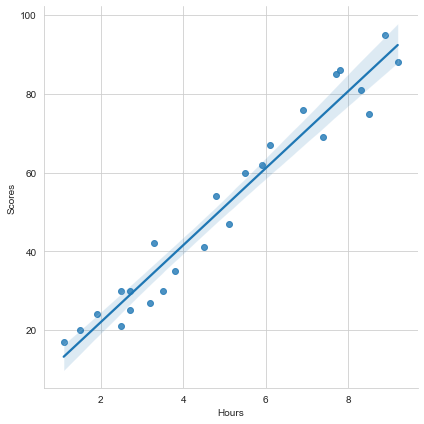

In [5]:
#Plotting the distribution

sns.set_style("whitegrid")

sns.lmplot(x='Hours',y='Scores',data=data,height=6)

#we got a clear Linear relation between "scores" and "hours" variables

Let's explore the correlation between "Hours" and "Scores" using pearson correlation

In [63]:
from scipy.stats import pearsonr

In [7]:
corr,_= pearsonr(data["Hours"],data["Scores"])
print ("pearson correlation : %.3f" % corr)

pearson correlation : 0.976


Pearson correlation between "scores" and "Hours" = 0.97 it means both are highly correlated with each other

# Training and Testing Data

In [8]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

Create an instance of a LinearRegression() model named lm

In [51]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

Fit lm() on the training data

In [52]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Test Data

In [53]:
pred= lm.predict(X_test)

In [54]:
df= pd.DataFrame({"Actual": y_test , "Predicted": pred})
df

,Actual,Predicted
0,20,16.506807
1,47,52.750005
2,42,34.628406
3,27,33.621650
4,41,46.709472
5,69,75.905382
6,17,12.479785


# Plotting Actual values vs predicted values

Text(0.5, 1.0, 'Actual vs Predicted')

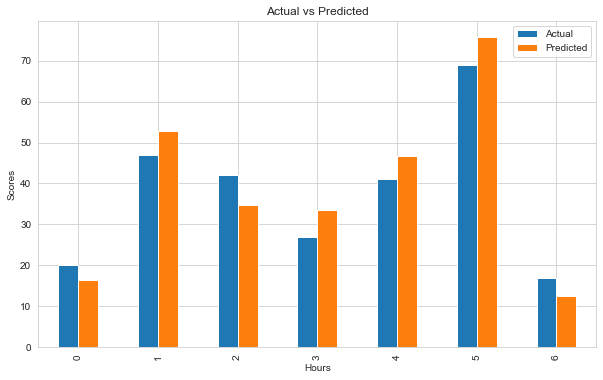

In [55]:
df.plot.bar(figsize=(10,6))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Actual vs Predicted")

# Testing model with our own value i.e 9.25 hours

In [56]:
pred_scores=lm.predict([[9.25]])
print("Predicted score:" , pred_scores)

Predicted score: [94.53035893]


# Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors   



In [57]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))

MAE: 5.767358910941684
